## House Prices - Advanced Regression Techniques

Zamislite da radite kao agent nekretnina i želite da predvidite cenu nekretnine bazirano na njenoj veličini (*square feet*). Koristimo Kaggle skup podataka koji sadrži realne informacije o ceni kuća u Ames-u, Iowa u SAD-u.

Kaggle dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [ ]:
import numpy as np
np.random.seed(42)

# Eksplorativna analiza podataka

In [ ]:
import pandas as pd

# učitavanje podataka
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML vežbe/dataset_houseprices/train.csv')

# prikaz prvih 5 redova
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Vidimo da skup podataka ima 81 kolonu. Primenićemo selekciju obeležja i inženjering obeležja da bismo pripremili skup podataka za modelovanje.

Ovo nam prikazuje tipove obeležja i koliko ima ne-nedostajućih (*non-null*) vrednosti. Vidimo da neke kolone sadrže nedostajuće vrednosti, što moramo da ishendlamo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Sledeće nam prikazuje statistiku za numeričke kolone u skupu podataka.

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df[['GrLivArea', 'SalePrice']].describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


In [ ]:
df[['GrLivArea', 'SalePrice']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


Dalje ćemo se fokusirati samo na kolone koje su nam neophodne. Želimo da predvidimo prodajnu cenu kuće bazirano na *square feet*.

Prvo ćemo vizualizovati odnos ovih varijabli korišćenjem scatter plot.

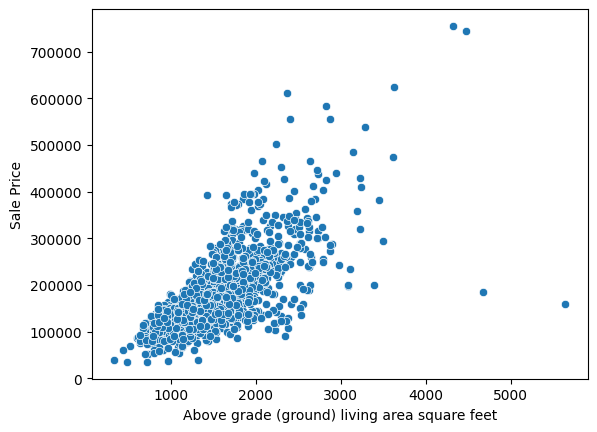

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.show()

Vidimo da postoji jasna pozitivna zavisnost između ovih varijabli. Međutim, takođe postoje neki *outlier*-i koje želimo da uklonimo.

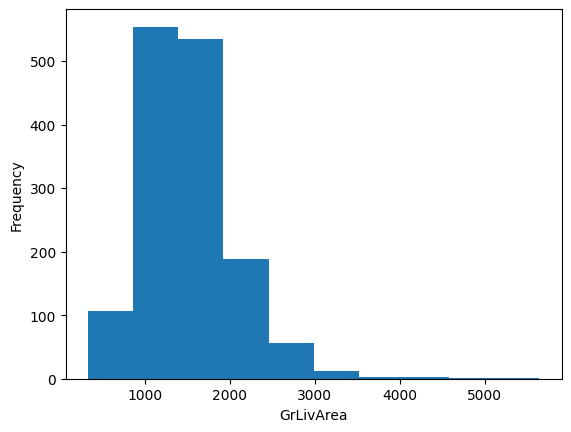

In [ ]:
live_area = df['GrLivArea']

plt.hist(live_area, bins=10)
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

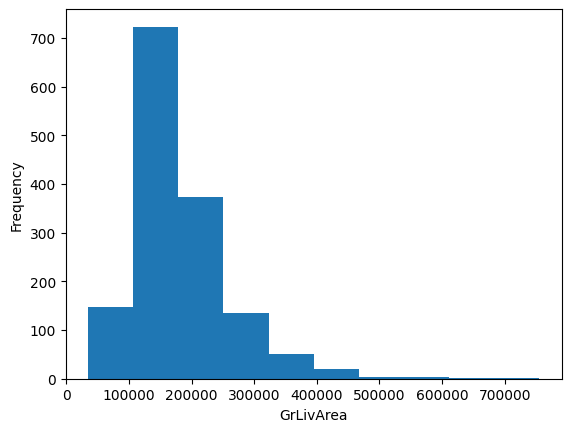

In [ ]:
live_area = df['SalePrice']

plt.hist(live_area, bins=10)
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

# Priprema podataka

Pre nego što izgradimo model, pripremićemo podatke tako što ćemo selektovati i srediti relevantna obeležja. U ovom slučaju, želimo da koristimo *living area square footage* (*GrLivArea*), te ćemo izbaciti sve ostale kolone iz skupa podataka.

In [ ]:
 train_df = df[['GrLivArea', 'SalePrice']]

Ukoliko ima nedostajućih vrednosti, možemo to srediti izbacivanjem redova koji ih sadrže.

In [ ]:
train_df.dropna(inplace=True)

<ipython-input-156-f2e1d0307b40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.dropna(inplace=True)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


Uklonićemo *outlier*-e iz skupa podataka. Za ovo ćemo izračunati z-score i uklonićemo primere gde je z-score veći od 3.

In [ ]:
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(train_df))
train_df = train_df[(z_scores < 3).all(axis=1)]

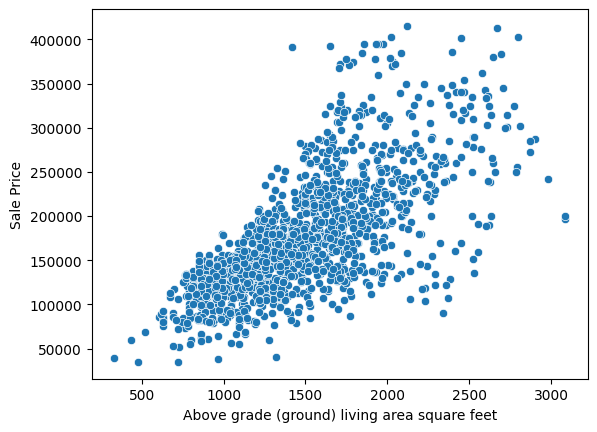

In [ ]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.show()

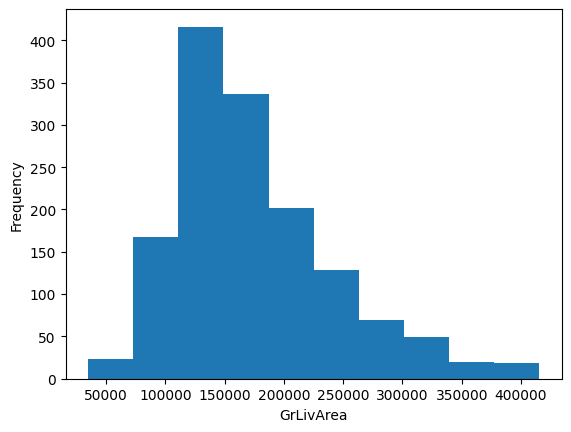

In [ ]:
live_area = train_df['SalePrice']

plt.hist(live_area, bins=10)
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

# Izgradnja modela

Podelićemo skup podataka na train i test skup. Napomena za stratifikaciju: https://chat.openai.com/share/5e669b5c-afee-4ad1-8463-c87ee939e28f

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using the training set
#scaler = StandardScaler()
#X_train_norm = scaler.fit_transform(X_train)
#X_test_norm = scaler.transform(X_test)

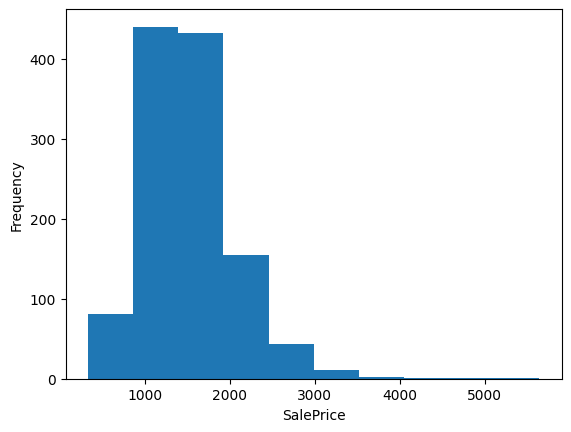

In [ ]:
plt.hist(X_train, bins=10)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

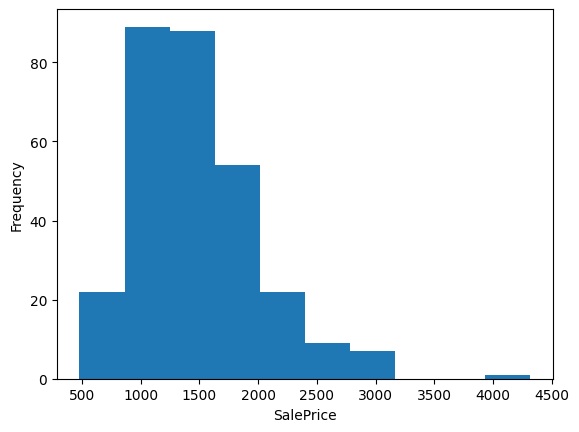

In [ ]:
plt.hist(X_test, bins=10)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

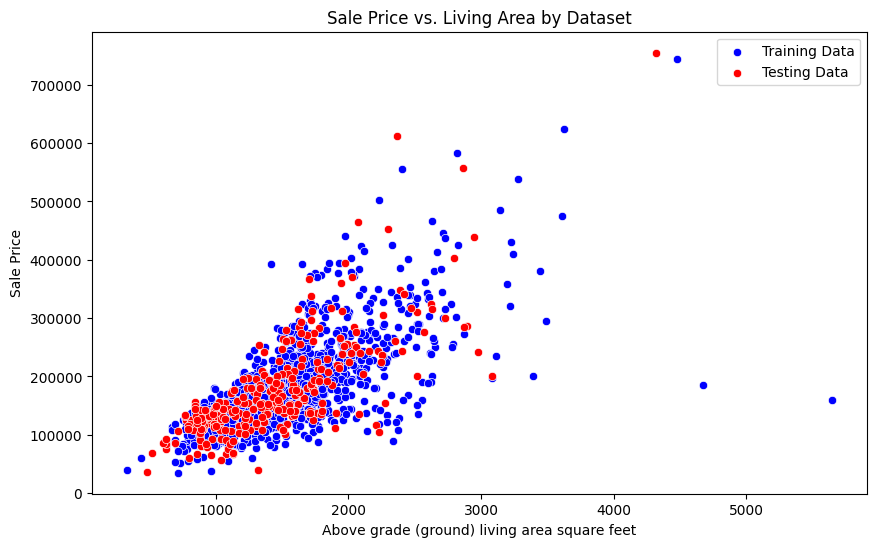

In [ ]:
plt.figure(figsize=(10, 6))  # Optional: Adjusts the figure size

# Reconstruct DataFrames for training and testing sets
tmp_train_df = pd.DataFrame(X_train).copy()
tmp_train_df['SalePrice'] = y_train.copy()

tmp_test_df = pd.DataFrame(X_test).copy()
tmp_test_df['SalePrice'] = y_test.copy()

# Plot training data in blue
sns.scatterplot(x='GrLivArea', y='SalePrice', data=tmp_train_df, color='blue', label='Training Data')

# Plot testing data in red
sns.scatterplot(x='GrLivArea', y='SalePrice', data=tmp_test_df, color='red', label='Testing Data')

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.title('Sale Price vs. Living Area by Dataset')  # Optional: Adds a title
plt.legend()  # Shows the legend
plt.show()

Fitovaćemo model na trening podatke.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Izgrađeni model možemo primeniti na test skup:

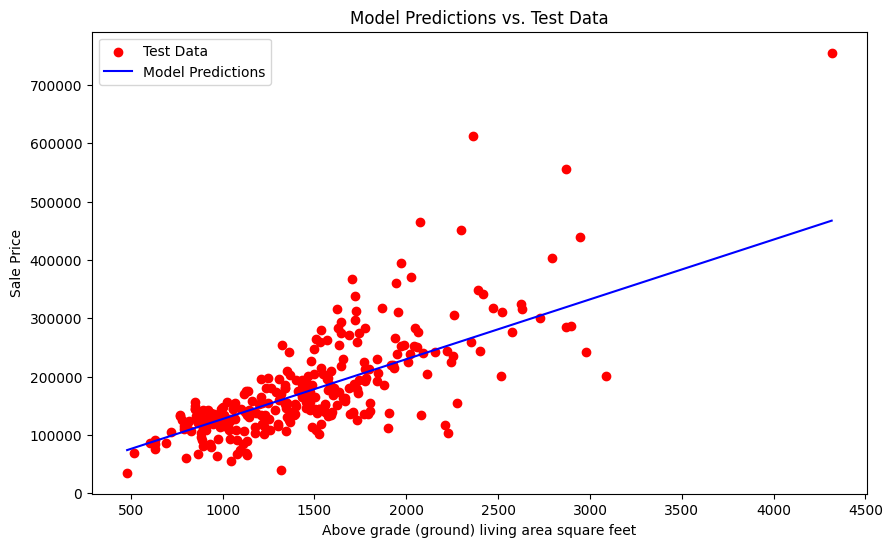

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='red', label='Test Data')

# Step 3: Plot the model's predictions
# To plot a line, you need to sort the values because the line plot connects points from left to right
sorted_indices = np.argsort(X_test.iloc[:, 0])  # Assuming X_test is a DataFrame and we're using the first column
plt.plot(X_test.iloc[sorted_indices, 0], y_pred[sorted_indices], color='blue', label='Model Predictions')

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.title('Model Predictions vs. Test Data')  # Adds a title
plt.legend()
plt.show()

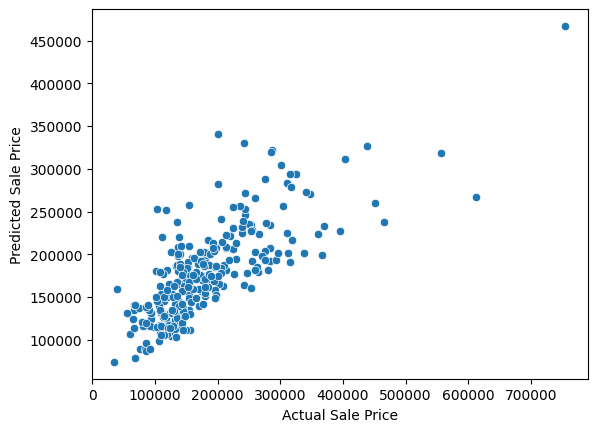

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

# Evaluacija modela

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error:{mse:.3f}')
print(f'Root mean squared error:{rmse:.3f}')
print(f'R^2 score:{r2:.3f}')

Mean squared error:3418946311.181
Root mean squared error:58471.757
R^2 score:0.554


Vidimo da je RMSE 58471.757 - standardna devijacija reziduala je 58471.757, tj. u proseku su predviđene cene kuća oko $58471.757 of stvarnih cena kuća.

R2 iznosti 55.4% - ovoliko varijacije u y (*SalePrice*) smo uspeli da objasnimo pomoću X (*GrLivArea*)

<Axes: ylabel='SalePrice'>

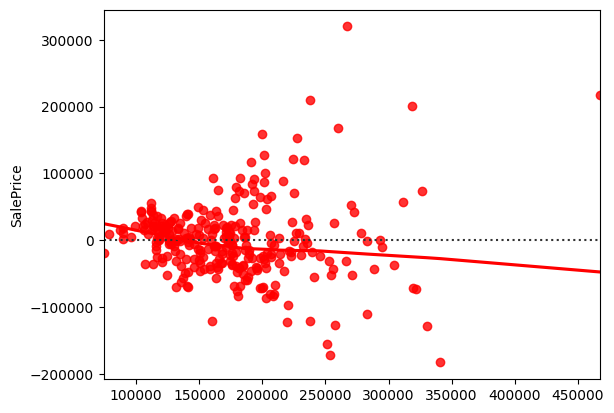

In [ ]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, color="r")

Idealno, reziduali bi trebali biti ravnomerno razbacani oko 0 (linija koja prikazuje trend treba da je što približnija horizontalnoj liniji y=0).

U ovom slučaju vidimo da to nije ispoštovano. Predviđanja na desnoj strani grafika (nekretnine viših cena) više odstupaju od stvarnih vrednosti u poređenju sa predviđanjima na levoj strani grafika (predviđanje nekretnina nižih cena). Slično ćete videti ako pogledate raniji grafik (Model predictions prikazane plavom linijom naspram test data prikazanih crvenim tačkama) - vidite oblik "levka".

Ovo znači da pretpostavke modela linearne regresije nisu ispoštovane. Transformacije y vrednosti (tipično logaritmovanje) ili transformacije x vrednosti (npr. model jednostruke linearne regresije koji koristi x^D kao obeležje umesto X) možda može da unapredi rezultate. Ovo ćemo isprobati niže u notebooku.

# Interpretacija modela

In [ ]:
coef = model.coef_
intercept = model.intercept_

print('Coefficient:', coef[0])
print('Intercept:', intercept)

Coefficient: 102.48895891672333
Intercept: 24899.74815733818


Ovo nam govori da za svaki dodatni *square foot of living area* cena nekretnine poraste za \$102.49.

Intercept je 24899.74, što znači da bi nekretnina koja ima 0 *square feet of living area* imala cenu \$24,899.74. Da li je ovo korektna interpretacija za ovaj kontekst?

Konačno, možemo vizuelizovati liniju (predikcije našeg modela) i razmotriti koliko se uklapa u podatke. Kreirali smo *scatter plot* obeležja 'GrLivArea' i labele 'SalePrice' i preko toga smo nacrtali liniju y = mx + b, gde je m koeficijent (model.coef_), a b intersept (intercept = model.intercept_).

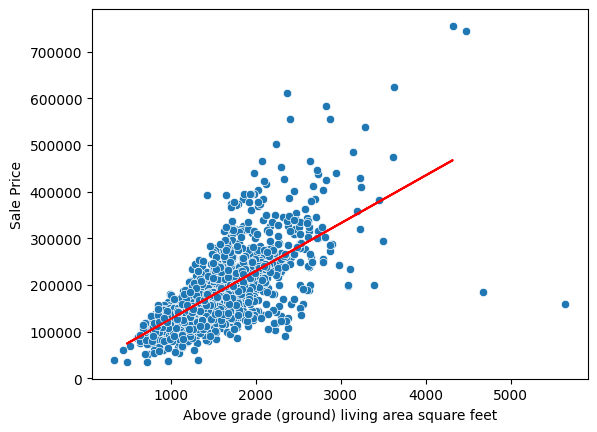

In [ ]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.plot(X_test, coef*X_test + intercept, color='red')
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.show()

Vidimo da se linija uklapa u podatke relativno dobro, iako neke tačke odstupaju od nje više (veći reziduali). Ovo daje uvid da model nije perfektan, ali da je koristan alat za predikciju cene nekretnine na osnovu *square footage*.

<Axes: ylabel='SalePrice'>

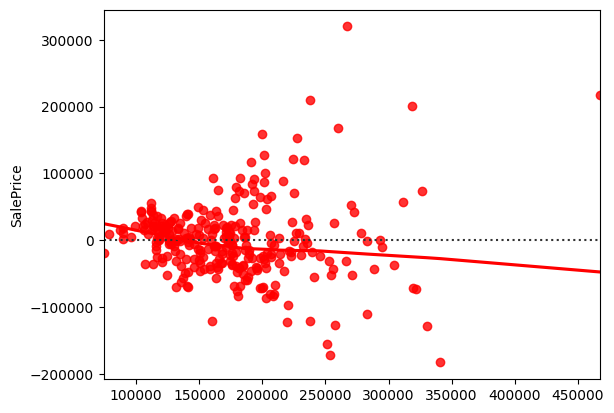

In [ ]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, color="r")

A residual plot is a type of diagnostic plot that is used to evaluate the quality of a linear regression model. The plot displays the difference between the observed values and the predicted values (i.e., the residuals) on the y-axis, and the predicted values on the x-axis. Here's how to interpret a residual plot:

1. **Homoscedasticity**: The first thing to look for in a residual plot  is homoscedasticity, which means that the variance of the residuals is constant across the range of predicted values. Ideally, the residuals should be randomly scattered around the horizontal line at zero, without any clear patterns or trends. If there is a clear pattern in the residuals (e.g., a cone shape or a U-shape), it indicates that the model is not capturing some important information in the data, and there may be non-linear relationships or heteroscedasticity in the data that need to be addressed.

2. **Linearity**: The second thing to look for in a residual plot is linearity, which means that the relationship between the predictor variable(s) and the response variable is linear. Ideally, the residuals should be randomly scattered around the horizontal line at zero, without any curvature or bending. If there is curvature or bending in the residuals (e.g., a curve shape), it suggests that the model is not capturing the correct functional form of the relationship between the predictor variable(s) and the response variable.

3. **Outliers**: The third thing to look for in a residual plot is outliers, which are data points that lie far away from the rest of the data. Outliers can have a large impact on the regression line, and they can affect the overall fit of the model. Ideally, the residuals should not have any outliers that are significantly far away from the horizontal line at zero.

In summary, a good residual plot should show randomly scattered residuals around the horizontal line at zero, with a constant variance across the range of predicted values. If the plot shows any patterns, curvature, or outliers, it indicates that the model may not be capturing the true relationship between the predictor variable(s) and the response variable, and further analysis is needed to improve the model.

# Da li možemo bolje? Feature engineering

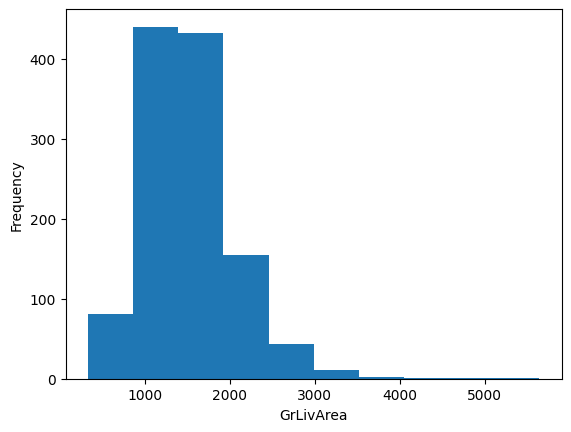

In [ ]:
plt.hist(X_train, bins=10)
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

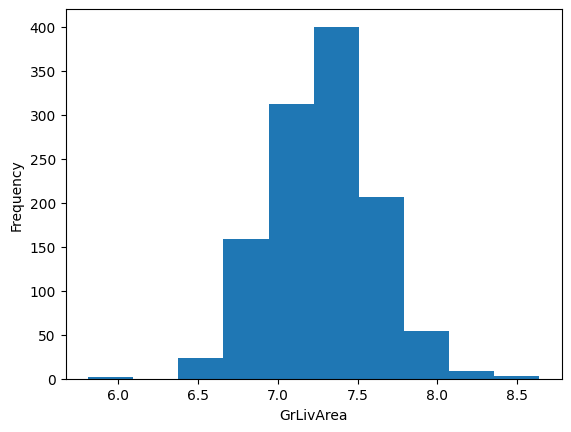

In [ ]:
plt.hist(np.log(X_train), bins=10)
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

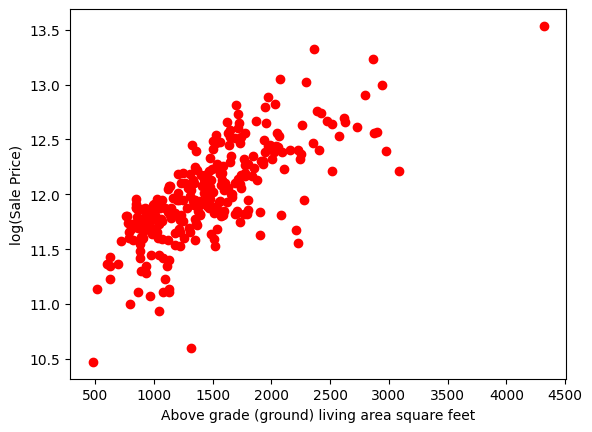

In [ ]:
plt.scatter(X_test, np.log(y_test), color='red', label='Test Data')
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('log(Sale Price)')
plt.show()

OLD:
	Coefficient: [102.48895892]
	Intercept: 24899.74815733818
	Mean squared error:3418946311.181
	Root mean squared error:58471.757
	R^2 score:0.554
LOG(y):
	Coefficient: [0.00051319]
	Intercept: 11.246804477869594
	Mean squared error: 0.086
	Root mean squared error: 0.293
	R^2 score: 0.540
Obratite pažnju: novi MSE/RMSE deluju dosta manji, ali je y logaritmovano!
Vraćanje u originalni oblik:
	Mean squared error: 3379974584.791
	Root mean squared error: 58137.549
	R^2 score: 0.559


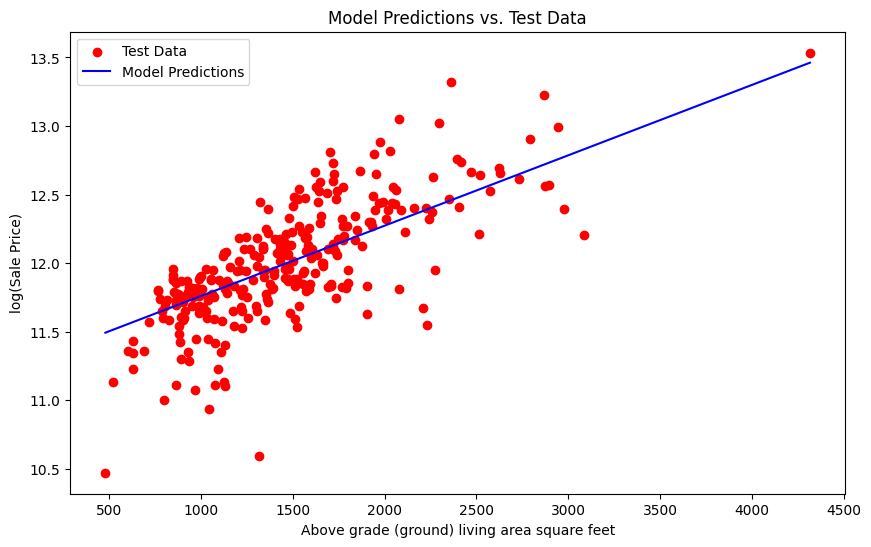

<Axes: ylabel='SalePrice'>

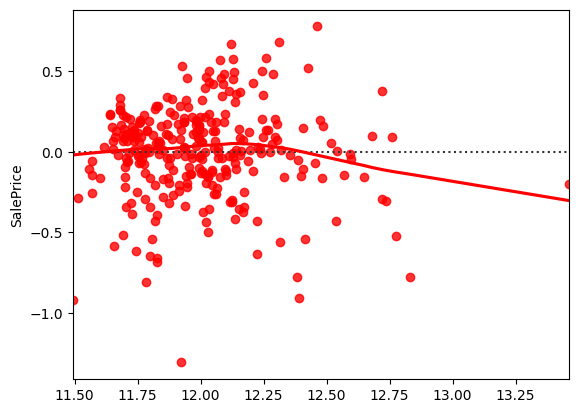

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

print("OLD:")
print('\tCoefficient:', model.coef_)
print('\tIntercept:', model.intercept_)
print(f'\tMean squared error:{mse:.3f}')
print(f'\tRoot mean squared error:{rmse:.3f}')
print(f'\tR^2 score:{r2:.3f}')

# Normalize the features using the training set
#scaler = StandardScaler()
#X_train_norm = scaler.fit_transform(X_train)
#X_test_norm = scaler.transform(X_test)


# Fit the linear regression model with the transformed variables
model1 = LinearRegression()
model1.fit(X_train, np.log(y_train))

# Predict the target variable using the model
y_pred1 = model1.predict(X_test)

print("LOG(y):")
mse1 = mean_squared_error(np.log(y_test), y_pred1)
rmse1 = np.sqrt(mse1)
r21 = r2_score(np.log(y_test), y_pred1)
print(f'\tCoefficient:', model1.coef_)
print(f'\tIntercept:', model1.intercept_)
print(f'\tMean squared error: {mse1:.3f}')
print(f'\tRoot mean squared error: {rmse1:.3f}')
print(f'\tR^2 score: {r21:.3f}')

print("Obratite pažnju: novi MSE/RMSE deluju dosta manji, ali je y logaritmovano!")
print("Vraćanje u originalni oblik:")
# Exponentiate the predictions to get them back on the original scale
y_pred1_exp = np.exp(y_pred1)
# Calculate MSE on the original scale
mse1_exp = mean_squared_error(y_test, y_pred1_exp)
# Calculate RMSE on the original scale
rmse1_exp = np.sqrt(mse1_exp)
r2_exp = r2_score(y_test, y_pred1_exp)
print(f'\tMean squared error: {mse1_exp:.3f}')
print(f'\tRoot mean squared error: {rmse1_exp:.3f}')
print(f'\tR^2 score: {r2_exp:.3f}')


plt.figure(figsize=(10, 6))
plt.scatter(X_test, np.log(y_test), color='red', label='Test Data')
sorted_indices = np.argsort(X_test.iloc[:, 0])  # Assuming X_test is a DataFrame and we're using the first column
plt.plot(X_test.iloc[sorted_indices, 0], y_pred1[sorted_indices], color='blue', label='Model Predictions')
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('log(Sale Price)')
plt.title('Model Predictions vs. Test Data')  # Adds a title
plt.legend()
plt.show()

residuals = np.log(y_test) - y_pred1
sns.residplot(x=y_pred1, y=residuals, lowess=True, color="r")

Sa grafika iznad deluje da je nakon logaritamsne transformacije y, odnos x i y linearan. Ovo se vidi, kako na slici predikcija modela naspram stvarnih vrednosti, tako i na poboljšanom grafiku reziduala. Grafik reziduala nije idealan, ali je bolji u odnosu na ranije. Možda bi uklanjanje dodatnih outliera malo pomoglo.

# Dalji koraci:

Možemo razmotriti da li kombinovanje GrLivArea sa nekim drugim obeležjem može da unapredi performanse modela. Još jedno obeležje koje je veoma relevantno za cenu nekretnine je broj spavaćih soba. Intuitivno, možemo očekivati da su kuće sa većim brojem spavaćih soba skuplje od kuća sa manjim brojem spavaćih soba.

Zadatak: fitovati model jednostruke linearne regresije gde će X biti kombinacije broja spavaćih soba i kvadrature (GrLivArea*BedroomAbvGr):
1. Izvršite eksplorativnu analizu. Da li su obeležja GrLivArea*BedroomAbvGr korelirana? U kakvoj su korelaciji obeležja sa cenom nekretnine? U kakvoj je korelaciji kombinacija ovih obeležja sa cenom nekretnine?
2. Izgradite i evaluirajte model. Da li su se peformanse poboljšale?
3. Interpretirajte dobijeni model.



# Ispitivanje stepena polinoma (obeležja x^2, x^3,... umesto x)

Na slici iznad deluje da je odnos x i y linearan, te da uvećavanje stepena x neće pomoći. Međutim, možemo ovo da isprobamo:
* Isprobavamo različite stepene x
* Pazimo na overfitting (obratite pažnju da koristimo i poseban validacioni skup da selektujemo najbolji model)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

X = df[['GrLivArea']]
y = df['SalePrice']

# Apply a logarithmic transformation to the target variable
y_log = np.log(y)

# First split into a temporary training set and a final test set
X_temp, X_test, y_temp, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Then split the temporary training set into the final training set and validation set
X_train, X_val, y_train_log, y_val_log = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Initialize a dictionary to store models and their performance metrics
models_performance = {}

# Trying out powers from 1 to 5 for example
for power in range(1, 6):
    # Create a new column for X^power
    X_train_poly = X_train ** power
    X_val_poly = X_val ** power

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train_log)

    # Make predictions on the validation set
    y_val_pred_log = model.predict(X_val_poly)

    # Calculate RMSE and R² on the validation set
    mse_val_log = mean_squared_error(y_val_log, y_val_pred_log)
    rmse_val_log = np.sqrt(mse_val_log)
    r2_val_log = r2_score(y_val_log, y_val_pred_log)

    # Store the performance metrics and the model
    models_performance[power] = {'RMSE_log': rmse_val_log, 'R2_log': r2_val_log, 'model': model}

# Find the best model based on RMSE or R² on the validation set
best_model_power = min(models_performance, key=lambda k: models_performance[k]['RMSE_log'])
best_model = models_performance[best_model_power]['model']

print(f"Best model on log scale is with power {best_model_power} with RMSE: {models_performance[best_model_power]['RMSE_log']}")

# Assess the chosen model on the test set
X_test_poly = X_test ** best_model_power
y_test_pred_log = best_model.predict(X_test_poly)
mse_test_log = mean_squared_error(y_test_log, y_test_pred_log)
rmse_test_log = np.sqrt(mse_test_log)
r2_test_log = r2_score(y_test_log, y_test_pred_log)

print(f"RMSE on test set for the best model (log scale): {rmse_test_log}")
print(f"R^2 on test set for the best model (log scale): {r2_test_log}")

# To compare with the original scale, we can exponentiate the predictions and the test target values
y_test_pred = np.exp(y_test_pred_log)
y_test_original = np.exp(y_test_log)
mse_test_original = mean_squared_error(y_test_original, y_test_pred)
rmse_test_original = np.sqrt(mse_test_original)
r2_test_original = r2_score(y_test_original, y_test_pred)

print(f"RMSE on test set for the best model (original scale): {rmse_test_original}")
print(f"R^2 on test set for the best model (original scale): {r2_test_original}")

Best model on log scale is with power 1 with RMSE: 0.27275737765027064
RMSE on test set for the best model (log scale): 0.29437589397435737
R^2 on test set for the best model (log scale): 0.5356329607478496
RMSE on test set for the best model (original scale): 58630.735448182284
R^2 on test set for the best model (original scale): 0.5518361219143808
